---
## Taller 3
## Uber Data Analytics

🚗 Uber Ride Analytics Dataset 2024
This comprehensive dataset contains detailed ride-sharing data from Uber operations for the year 2024, providing rich insights into booking patterns, vehicle performance, revenue streams, cancellation behaviors, and customer satisfaction metrics.

tomado de https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard?select=ncr_ride_bookings.csv

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de Datos de Yber: Exploración de Factores que Influyen en las Buenas Calificaciones

En este proyecto trabajaremos con un conjunto de datos anuales de la plataforma **Yber**. Nuestro objetivo principal es identificar **relaciones significativas entre variables**, con el fin de comprender de qué dependen las **buenas calificaciones** otorgadas por los usuarios dentro de la plataforma.

## Objetivos del análisis:

1. **Limpiar y preparar los datos** para su análisis.
2. Explorar las **correlaciones entre variables**.
3. Investigar cuáles factores están más relacionados con las **calificaciones positivas**.

El primer paso será realizar una **limpieza y transformación de los datos**, asegurando que estén en un formato adecuado para su análisis estadístico y visualización.

---

In [25]:
## informacion general
df = pd.read_csv("ncr_ride_bookings.csv", nrows=5000)
print("Dimensiones:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

Dimensiones: (5000, 21)

Tipos de datos:
Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object


In [26]:

df = pd.read_csv("ncr_ride_bookings.csv", nrows=5000)
print(df.head())

         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...         


Valores nulos por columna:
Incomplete Rides Reason              4693
Incomplete Rides                     4693
Cancelled Rides by Customer          4644
Reason for cancelling by Customer    4644
Driver Cancellation Reason           4126
Cancelled Rides by Driver            4126
Customer Rating                      1876
Driver Ratings                       1876
Ride Distance                        1569
Booking Value                        1569
Payment Method                       1569
Avg CTAT                             1569
Avg VTAT                              339
Time                                    0
Drop Location                           0
Pickup Location                         0
Vehicle Type                            0
Customer ID                             0
Booking Status                          0
Booking ID                              0
Date                                    0
dtype: int64


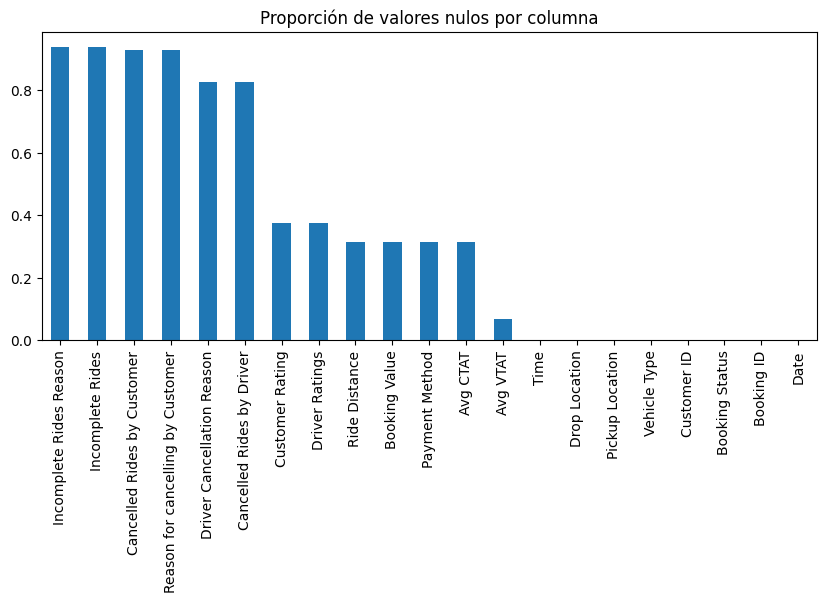

In [27]:
# ---------------------
# 2. Valores nulos
# ---------------------
print("\nValores nulos por columna:")
print(df.isnull().sum().sort_values(ascending=False))

# Gráfico de nulos
plt.figure(figsize=(10,4))
df.isnull().mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Proporción de valores nulos por columna")
plt.show()

❌ Columnas con MUCHÍSIMOS nulos (casi todo vacío):
- Incomplete Rides / Incomplete Rides Reason
- Cancelled Rides by Customer / Reason for cancelling by Customer
- Cancelled Rides by Driver / Driver Cancellation Reason

⚠️ Columnas con NULOS intermedios:
- Customer Rating
- Driver Ratings
- Ride Distance
- Booking Value
- Payment Method
- Avg CTAT
- Avg VTAT

✅ Columnas completas (sin nulos):
- Date
- Time
- Booking ID
- Booking Status
- Customer ID
- Vehicle Type
- Pickup Location
- Drop Location

In [28]:
df = df.drop(columns=[
    "Incomplete Rides", "Incomplete Rides Reason",
    "Cancelled Rides by Customer", "Reason for cancelling by Customer",
    "Cancelled Rides by Driver", "Driver Cancellation Reason"
])

print(df.head)

<bound method NDFrame.head of             Date      Time    Booking ID         Booking Status   Customer ID  \
0     2024-03-23  12:29:38  "CNR5884300"        No Driver Found  "CID1982111"   
1     2024-11-29  18:01:39  "CNR1326809"             Incomplete  "CID4604802"   
2     2024-08-23  08:56:10  "CNR8494506"              Completed  "CID9202816"   
3     2024-10-21  17:17:25  "CNR8906825"              Completed  "CID2610914"   
4     2024-09-16  22:08:00  "CNR1950162"              Completed  "CID9933542"   
...          ...       ...           ...                    ...           ...   
4995  2024-09-04  20:11:25  "CNR7315515"              Completed  "CID6081063"   
4996  2024-08-29  09:37:57  "CNR6471955"        No Driver Found  "CID5393095"   
4997  2024-11-10  18:22:00  "CNR7584719"              Completed  "CID5329690"   
4998  2024-03-11  11:48:16  "CNR1823832"              Completed  "CID8488663"   
4999  2024-06-03  11:27:36  "CNR4241193"  Cancelled by Customer  "CID4859117"  


Valores nulos por columna:
Driver Ratings     1876
Customer Rating    1876
Avg CTAT           1569
Booking Value      1569
Ride Distance      1569
Payment Method     1569
Avg VTAT            339
Date                  0
Time                  0
Booking ID            0
Booking Status        0
Customer ID           0
Vehicle Type          0
Pickup Location       0
Drop Location         0
dtype: int64


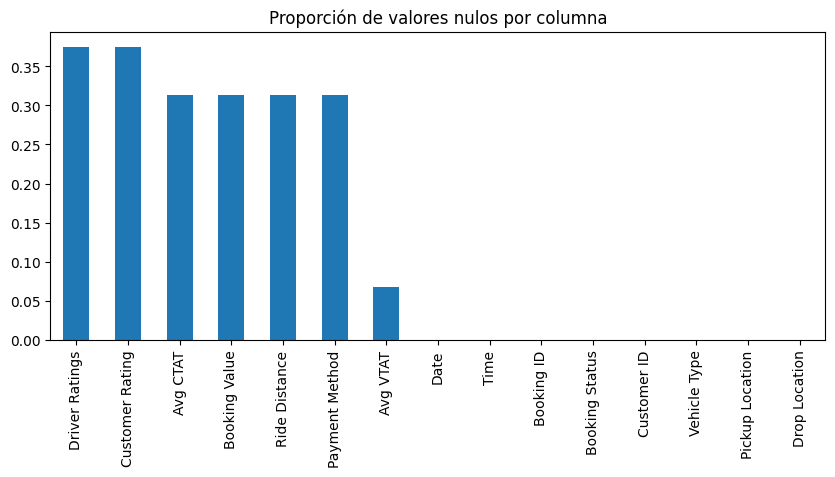

In [29]:
print("\nValores nulos por columna:")
print(df.isnull().sum().sort_values(ascending=False))

# Gráfico de nulos
plt.figure(figsize=(10,4))
df.isnull().mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Proporción de valores nulos por columna")
plt.show()

Ratings, Distancia, Valor de viaje, Método de pago → importantes para el análisis de negocio.

Se pueden imputar:

Números → media/mediana o un valor especial (ej. 0 si significa “no aplica”).

Categorías → Unknown.

In [30]:
df["Customer Rating"].fillna(df["Customer Rating"].median(), inplace=True)
df["Driver Ratings"].fillna(df["Driver Ratings"].median(), inplace=True)
df["Ride Distance"].fillna(df["Ride Distance"].median(), inplace=True)
df["Booking Value"].fillna(df["Booking Value"].median(), inplace=True)
df["Avg CTAT"].fillna(df["Avg CTAT"].median(), inplace=True)
df["Avg VTAT"].fillna(df["Avg VTAT"].median(), inplace=True)
df["Payment Method"].fillna("Unknown", inplace=True)


Valores nulos por columna:
Date               0
Time               0
Booking ID         0
Booking Status     0
Customer ID        0
Vehicle Type       0
Pickup Location    0
Drop Location      0
Avg VTAT           0
Avg CTAT           0
Booking Value      0
Ride Distance      0
Driver Ratings     0
Customer Rating    0
Payment Method     0
dtype: int64


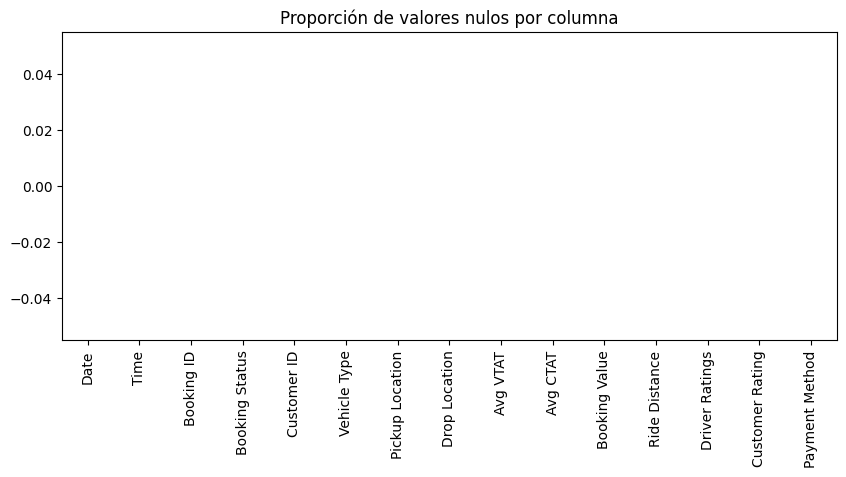

In [31]:
print("\nValores nulos por columna:")
print(df.isnull().sum().sort_values(ascending=False))

# Gráfico de nulos
plt.figure(figsize=(10,4))
df.isnull().mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Proporción de valores nulos por columna")
plt.show()

In [32]:
# ---------------------
# 3. Estadísticas descriptivas
# ---------------------
print("\nEstadísticas numéricas:")
print(df.describe())



Estadísticas numéricas:
          Avg VTAT    Avg CTAT  Booking Value  Ride Distance  Driver Ratings  \
count  5000.000000  5000.00000    5000.000000    5000.000000     5000.000000   
mean      8.490360    28.87264     474.438600      24.596268        4.255360   
std       3.644961     7.34281     336.713937      11.649184        0.346166   
min       2.000000    10.10000      50.000000       1.240000        3.000000   
25%       5.600000    24.60000     316.000000      17.382500        4.200000   
50%       8.300000    28.60000     408.000000      24.040000        4.300000   
75%      11.000000    32.80000     512.250000      31.212500        4.300000   
max      20.000000    45.00000    4220.000000      49.970000        5.000000   

       Customer Rating  
count      5000.000000  
mean          4.442140  
std           0.346639  
min           3.000000  
25%           4.300000  
50%           4.500000  
75%           4.600000  
max           5.000000  


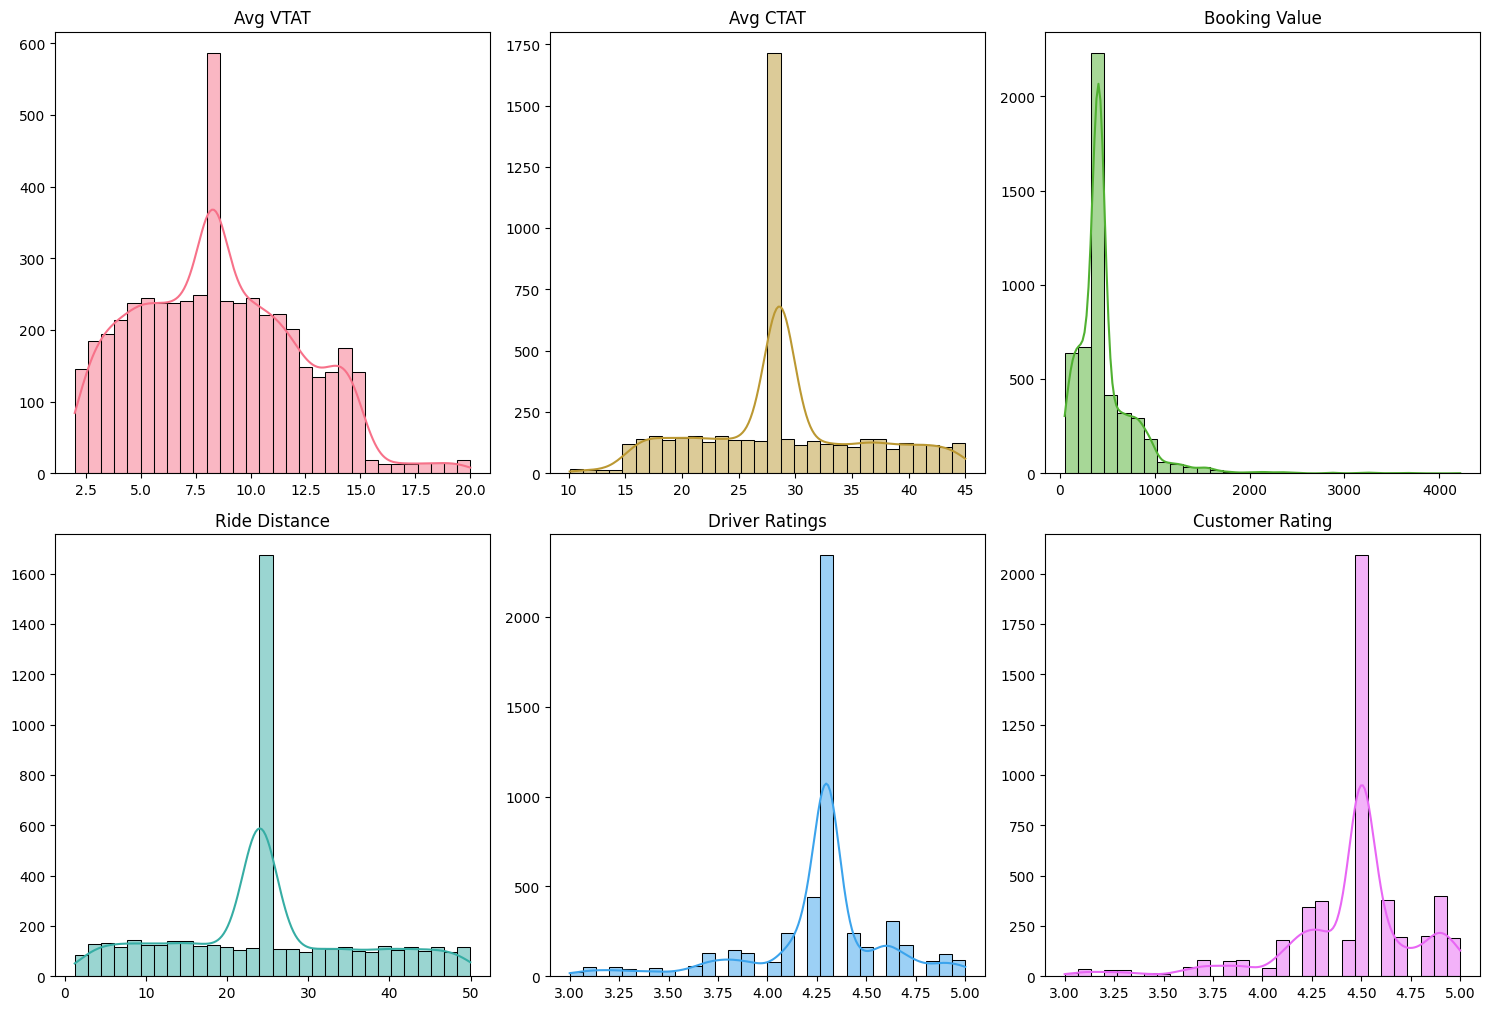

In [33]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Generar paleta con el mismo número de colores que columnas
palette = sns.color_palette("husl", len(num_cols))

# Layout dinámico
n = len(num_cols)
filas = (n // 3) + 1
plt.figure(figsize=(15, 5*filas))

# Iterar sobre columnas numéricas
for i, col in enumerate(num_cols, 1):
    plt.subplot(filas, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color=palette[i-1])
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

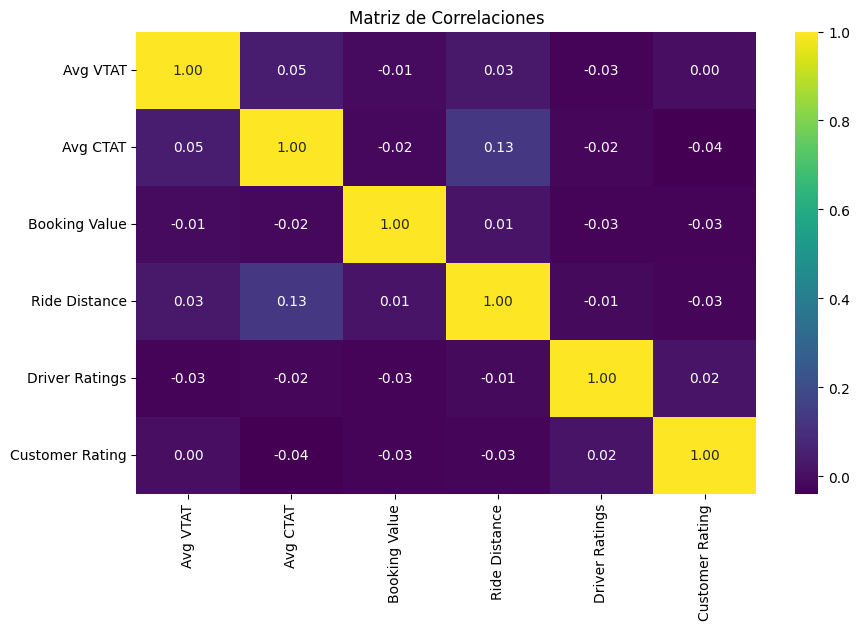

In [34]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

C:\Users\isaac\AppData\Local\Temp\ipykernel_12228\2596191517.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour
C:\Users\isaac\AppData\Local\Temp\ipykernel_12228\2596191517.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Hour", y="Customer Rating", ci=None, marker="o")


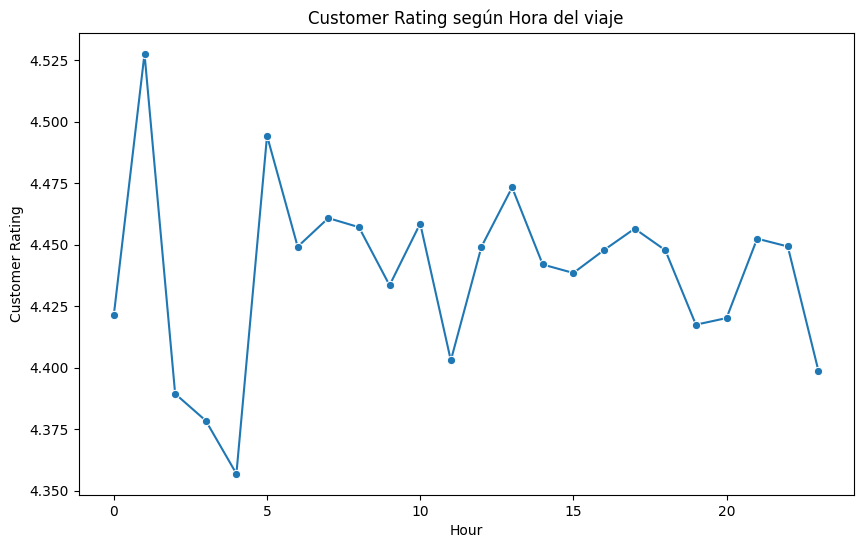

In [35]:
# Convertir columna Time a hora
df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Hour", y="Customer Rating", ci=None, marker="o")
plt.title("Customer Rating según Hora del viaje")
plt.show()

1. Variabilidad según la hora del día

Se observa una variación leve pero clara en las calificaciones a lo largo del día.

Las mejores calificaciones tienden a darse en horas tempranas, especialmente alrededor de la 1 a.m..

Las calificaciones más bajas ocurren entre las 3 a.m. y 4 a.m., y también un poco más tarde en la noche.

2. Patrón general

Aunque no hay una caída drástica en las calificaciones, sí existe un patrón de ligera disminución en horas de alta actividad, como en la tarde y noche.

Las horas centrales del día (entre 9 a.m. y 5 p.m.) muestran calificaciones estables pero un poco más bajas en comparación con la madrugada.

C:\Users\isaac\AppData\Local\Temp\ipykernel_12228\647467817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Vehicle Type", y="Driver Ratings", palette="Set3")


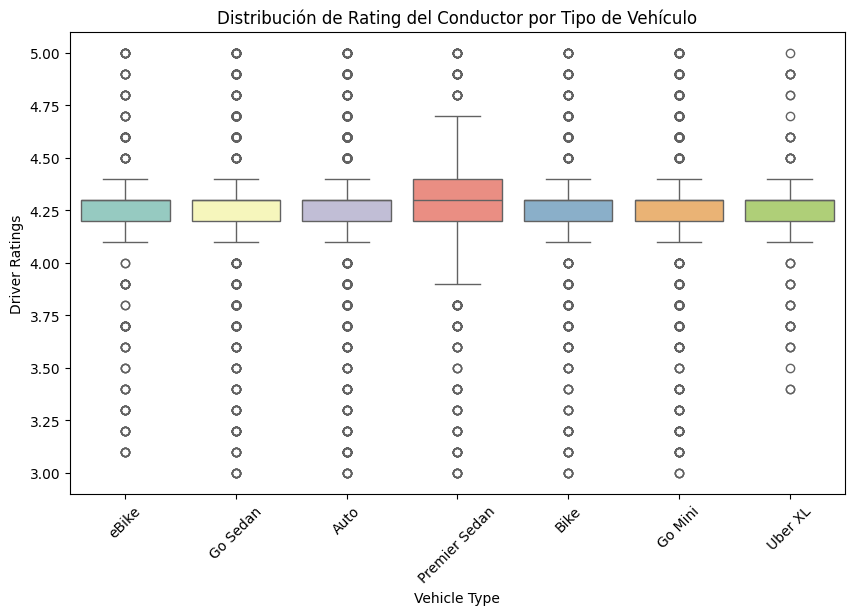

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Vehicle Type", y="Driver Ratings", palette="Set3")
plt.title("Distribución de Rating del Conductor por Tipo de Vehículo")
plt.xticks(rotation=45)
plt.show()


1. Premier Sedan destaca con mejores calificaciones

Premier Sedan muestra una mediana más alta que el resto de las categorías.

También tiene un rango intercuartílico (IQR) más elevado, lo cual indica que la mayoría de sus conductores son consistentemente mejor calificados.

Aunque tiene algunos valores bajos, su tendencia central es positiva.

2. Tipos de vehículos con menor variabilidad

Categorías como Ebike, Go Sedan, Auto, Go Mini, y Uber XL presentan una mediana bastante similar (alrededor de 4.25).

Estas categorías tienen una dispersión moderada, con algunos outliers hacia abajo (ratings bajos), pero en general se mantienen en un rango estable.

3. Outliers frecuentes

Todas las categorías tienen outliers hacia abajo (puntos sueltos debajo del bigote inferior del boxplot), indicando que hay viajes que fueron calificados negativamente sin importar el tipo de vehículo.

Esto sugiere que otros factores además del tipo de vehículo también influyen fuertemente en la calificación del conductor (por ejemplo, la actitud del conductor, puntualidad, condiciones del viaje, etc.).

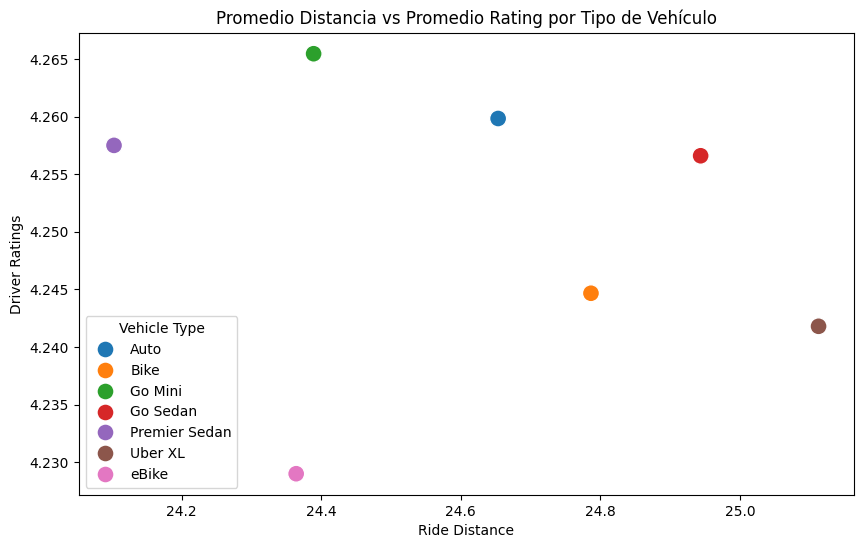

In [37]:
df_grouped = df.groupby("Vehicle Type").agg({
    "Ride Distance": "mean",
    "Driver Ratings": "mean"
}).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_grouped, x="Ride Distance", y="Driver Ratings", hue="Vehicle Type", s=150)
plt.title("Promedio Distancia vs Promedio Rating por Tipo de Vehículo")
plt.show()

## 📌 Conclusión General del Análisis de Calificaciones en Yber

A partir del análisis gráfico realizado, se pueden obtener varias conclusiones relevantes sobre los factores que parecen influir en las calificaciones de los conductores dentro de la plataforma Yber:

### 1. 🕐 Influencia de la Hora del Viaje
La hora del día tiene un impacto leve pero observable en las calificaciones:
- Las **mejores calificaciones** tienden a darse durante la **madrugada**, especialmente entre la 1 a.m. y 2 a.m.
- Las **horas pico** y de mayor actividad (mañana y tarde) muestran una ligera disminución en los ratings.
> Esto sugiere que **el contexto temporal**, como el tráfico, el estado de ánimo de los pasajeros o la disponibilidad del servicio, puede influir en la percepción del viaje.

---

### 2. 🚗 Tipo de Vehículo y Calificaciones
- Aunque **la mayoría de los tipos de vehículos presentan calificaciones similares**, se observa que los **vehículos de gama más alta**, como `Premier Sedan` y `Go Mini`, tienen calificaciones ligeramente superiores.
- Todas las categorías presentan **outliers negativos**, lo que indica que **el tipo de vehículo no garantiza una buena experiencia**, aunque puede influir.

---

### 3. 📏 Relación entre Distancia Promedio y Calificación
- No se identificó una **correlación directa fuerte** entre la **distancia promedio del viaje** y la **calificación del conductor**.
- Vehículos como `Go Mini` y `Premier Sedan` tienen **mejores ratings** pese a recorrer distancias menores.
- Por el contrario, categorías como `Uber XL` y `eBike` presentan calificaciones más bajas, incluso con distancias similares o más largas.

---

### 🧠 Conclusión Final
> Las **calificaciones dentro de Yber parecen depender más del tipo de servicio y el contexto del viaje (hora y tipo de vehículo)** que de factores como la duración del trayecto. Aunque todos los tipos de vehículos tienen un rendimiento relativamente bueno, los servicios **más cómodos o premium tienden a generar una mejor experiencia** para el usuario.

Esto sugiere que, si Yber desea mejorar sus calificaciones, podría enfocarse en:
- Ofrecer mayor disponibilidad de vehículos mejor valorados.
- Mejorar la experiencia del usuario en horarios donde las calificaciones tienden a bajar.
